In [ ]:
#### Problem Statement

In [ ]:
# Exploratory Data Analysis -- Telecom Churn data

In [4]:
# import Basic Package

import pandas as pd # For Data Manipulation
import numpy as np # For Mathematical Calculation
import matplotlib.pyplot as plt # For Visualization
import seaborn as sns # For Visualization
%matplotlib inline # Visualization Inline
sns.set() 

In [5]:
df=pd.read_csv("/content/Telecom Churn.csv")

In [7]:
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
df.shape

(3333, 20)

In [10]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
# Dropping Column which Is Not Useful ---

In [14]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [19]:
df["Account length"]

0       128
1       107
2       137
3        84
4        75
       ... 
3328    192
3329     68
3330     28
3331    184
3332     74
Name: Account length, Length: 3333, dtype: int64

In [20]:
df=df.drop(columns=["Account length"],axis=1)

In [23]:
df.columns

Index(['State', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')

In [26]:
df["Churn"]

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: Churn, Length: 3333, dtype: bool

In [28]:
df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [37]:
churn     = df[df["Churn"] == bool(True)]
not_churn = df[df["Churn"] == bool(False)]

In [29]:
# State

In [32]:
df["State"]

0       KS
1       OH
2       NJ
3       OH
4       OK
        ..
3328    AZ
3329    WV
3330    RI
3331    CT
3332    TN
Name: State, Length: 3333, dtype: object

In [34]:
df["State"].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

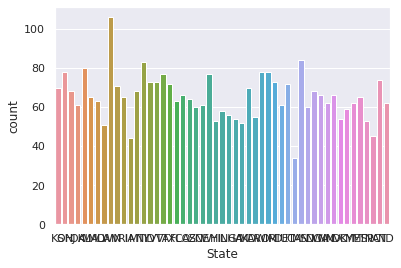

In [35]:
sns.countplot(data=df,x="State")
plt.show()

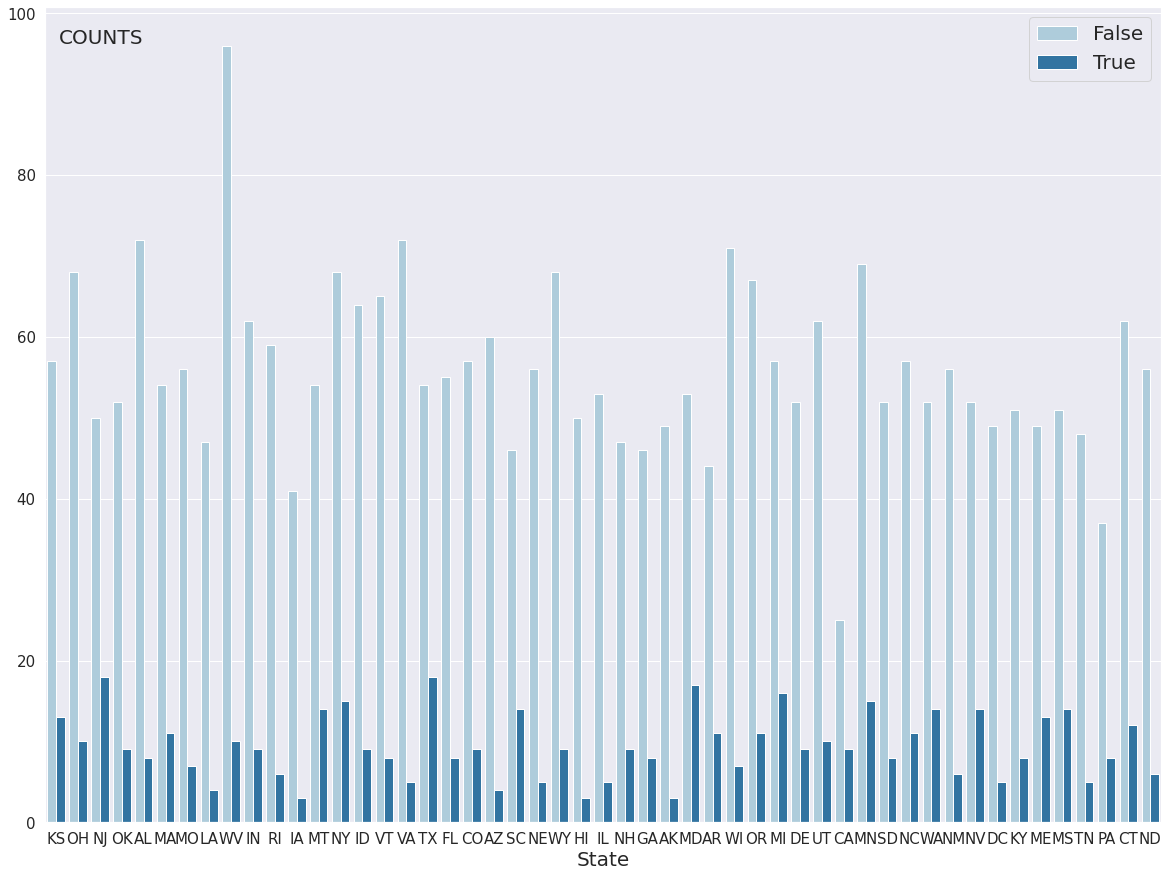

In [40]:
fig, axz = plt.subplots(figsize=(20,15))

axz = sns.countplot(x='State', hue='Churn', data=df, palette='Paired')


axz.set_ylabel('COUNTS', rotation=0, labelpad=100,size=20)
axz.set_xlabel('State', size=20)
axz.yaxis.set_label_coords(0.05, 0.95)  # (x, y)
axz.legend(loc=0,fontsize=20);

axz.tick_params(labelsize=15)

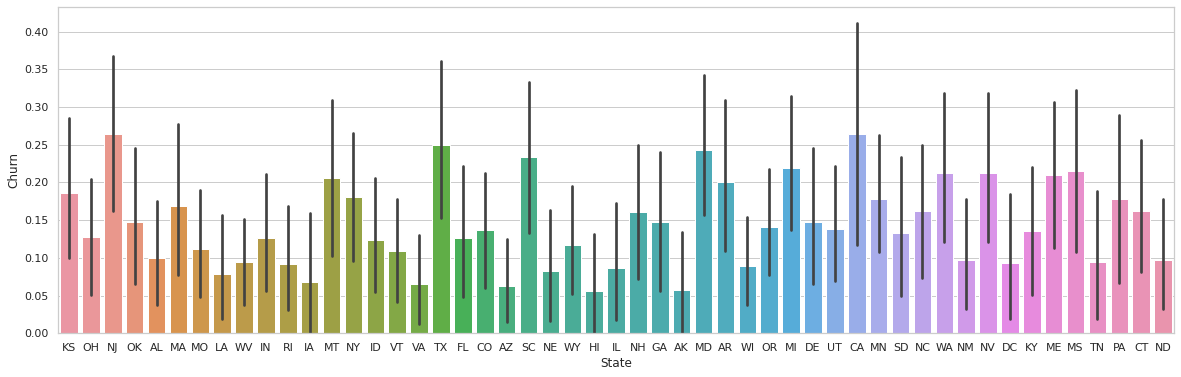

In [42]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.barplot(x='State',y='Churn', data=df)

In [43]:
df.columns

Index(['State', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')

In [ ]:
# Area Code

In [44]:
df["Area code"]

0       415
1       415
2       415
3       408
4       415
       ... 
3328    415
3329    415
3330    510
3331    510
3332    415
Name: Area code, Length: 3333, dtype: int64

In [45]:
df["Area code"].unique()

array([415, 408, 510])

In [ ]:
# International plan

In [46]:
df["International plan"]

0        No
1        No
2        No
3       Yes
4       Yes
       ... 
3328     No
3329     No
3330     No
3331    Yes
3332     No
Name: International plan, Length: 3333, dtype: object

In [47]:
df["International plan"].unique()

array(['No', 'Yes'], dtype=object)

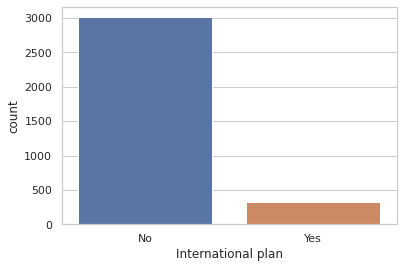

In [48]:
sns.countplot(data=df,x="International plan")
plt.show()

In [ ]:
# Voice Mail Plan

In [49]:
df["Voice mail plan"]

0       Yes
1       Yes
2        No
3        No
4        No
       ... 
3328    Yes
3329     No
3330     No
3331     No
3332    Yes
Name: Voice mail plan, Length: 3333, dtype: object

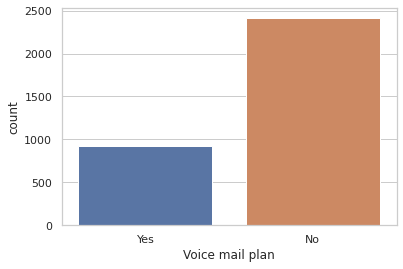

In [50]:
sns.countplot(data=df, x="Voice mail plan")
plt.show()

In [51]:
df["Number vmail messages"]

0       25
1       26
2        0
3        0
4        0
        ..
3328    36
3329     0
3330     0
3331     0
3332    25
Name: Number vmail messages, Length: 3333, dtype: int64

In [52]:
df["Number vmail messages"].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Number vmail message')

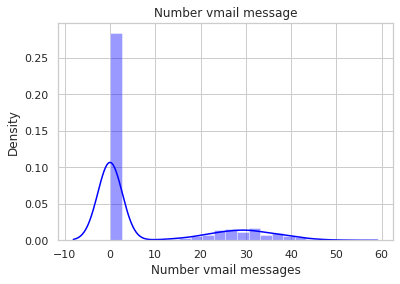

In [54]:
sns.distplot(df["Number vmail messages"],color="Blue")
plt.title("Number vmail message")

In [55]:
df["Number vmail messages"].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: Number vmail messages, dtype: float64

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


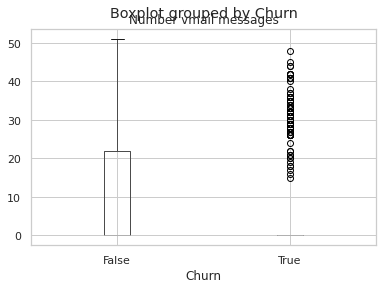

In [58]:
df.boxplot(column="Number vmail messages", by="Churn")
plt.show()

In [59]:
df.columns

Index(['State', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')

In [61]:
df["Total day minutes"].unique()

array([265.1, 161.6, 243.4, ..., 321.1, 231.1, 180.8])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


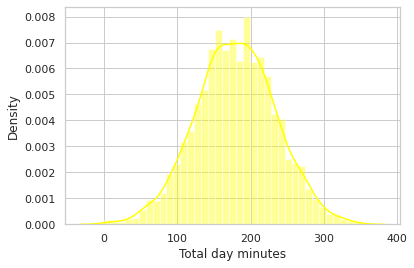

In [63]:
sns.distplot(df["Total day minutes"], color="Yellow")
plt.show()

In [64]:
df["Total day minutes"].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: Total day minutes, dtype: float64

In [ ]:
# Total day calls

In [65]:
df["Total day calls"].unique()

array([110, 123, 114,  71, 113,  98,  88,  79,  97,  84, 137, 127,  96,
        70,  67, 139,  66,  90, 117,  89, 112, 103,  86,  76, 115,  73,
       109,  95, 105, 121, 118,  94,  80, 128,  64, 106, 102,  85,  82,
        77, 120, 133, 135, 108,  57,  83, 129,  91,  92,  74,  93, 101,
       146,  72,  99, 104, 125,  61, 100,  87, 131,  65, 124, 119,  52,
        68, 107,  47, 116, 151, 126, 122, 111, 145,  78, 136, 140, 148,
        81,  55,  69, 158, 134, 130,  63,  53,  75, 141, 163,  59, 132,
       138,  54,  58,  62, 144, 143, 147,  36,  40, 150,  56,  51, 165,
        30,  48,  60,  42,   0,  45, 160, 149, 152, 142, 156,  35,  49,
       157,  44])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


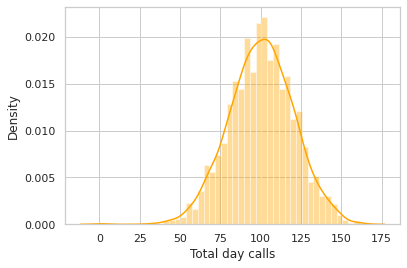

In [66]:
sns.distplot(df["Total day calls"], color="Orange")
plt.show()

In [68]:
df.columns

Index(['State', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')

In [69]:
df["Total day charge"].value_counts()

26.18    8
27.12    8
29.67    8
31.18    7
29.82    7
        ..
13.36    1
34.15    1
43.23    1
41.99    1
30.74    1
Name: Total day charge, Length: 1667, dtype: int64

In [71]:
df["Total day charge"].unique()

array([45.07, 27.47, 41.38, ..., 54.59, 39.29, 30.74])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


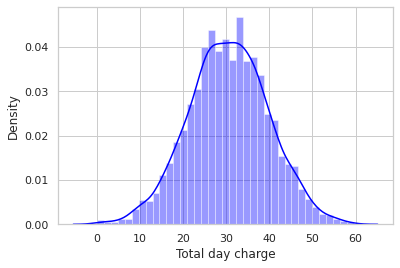

In [72]:
sns.distplot(df["Total day charge"],color="Blue")
plt.show()

In [73]:
df["Total day charge"].describe()

count    3333.000000
mean       30.562307
std         9.259435
min         0.000000
25%        24.430000
50%        30.500000
75%        36.790000
max        59.640000
Name: Total day charge, dtype: float64

In [ ]:
# Total eve minutes

In [74]:
df["Total eve minutes"].value_counts()

169.9    9
167.2    7
180.5    7
201.0    7
161.7    7
        ..
75.3     1
293.9    1
232.8    1
173.2    1
265.9    1
Name: Total eve minutes, Length: 1611, dtype: int64

In [75]:
df["Total eve minutes"].unique()

array([197.4, 195.5, 121.2, ..., 153.4, 288.8, 265.9])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


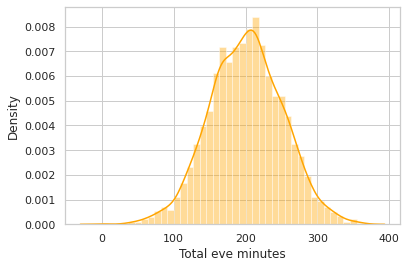

In [76]:
sns.distplot(df["Total eve minutes"], color="Orange")
plt.show()

In [77]:
df["Total eve minutes"].describe()

count    3333.000000
mean      200.980348
std        50.713844
min         0.000000
25%       166.600000
50%       201.400000
75%       235.300000
max       363.700000
Name: Total eve minutes, dtype: float64

In [78]:
df["Total eve calls"].value_counts()

105    80
94     79
108    71
102    70
97     70
       ..
49      1
37      1
164     1
42      1
170     1
Name: Total eve calls, Length: 123, dtype: int64

In [79]:
df["Total eve calls"].unique()

array([ 99, 103, 110,  88, 122, 101, 108,  94,  80, 111,  83, 148,  71,
        75,  76,  97,  90,  65,  93, 121, 102,  72, 112, 100,  84, 109,
        63, 107, 115, 119, 116,  92,  85,  98, 118,  74, 117,  58,  96,
        66,  67,  62,  77, 164, 126, 142,  64, 104,  79,  95,  86, 105,
        81, 113, 106,  59,  48,  82,  87, 123, 114, 140, 128,  60,  78,
       125,  91,  46, 138, 129,  89, 133, 136,  57, 135, 139,  51,  70,
       151, 137, 134,  73, 152, 168,  68, 120,  69, 127, 132, 143,  61,
       124,  42,  54, 131,  52, 149,  56,  37, 130,  49, 146, 147,  55,
        12,  50, 157, 155,  45, 144,  36, 156,  53, 141,  44, 153, 154,
       150,  43,   0, 145, 159, 170])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


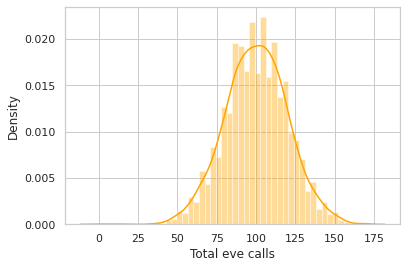

In [80]:
sns.distplot(df["Total eve calls"], color="Orange")
plt.show()

In [81]:
df["Total eve calls"].describe()

count    3333.000000
mean      100.114311
std        19.922625
min         0.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       170.000000
Name: Total eve calls, dtype: float64

In [82]:
df.columns

Index(['State', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')

In [ ]:
# Total intl calls

In [83]:
df["Total intl calls"].value_counts()

3     668
4     619
2     489
5     472
6     336
7     218
1     160
8     116
9     109
10     50
11     28
0      18
12     15
13     14
15      7
14      6
18      3
16      2
19      1
20      1
17      1
Name: Total intl calls, dtype: int64

In [84]:
df["Total intl calls"].describe()

count    3333.000000
mean        4.479448
std         2.461214
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: Total intl calls, dtype: float64

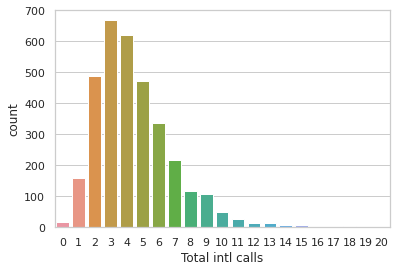

In [85]:
sns.countplot(data=df, x="Total intl calls")
plt.show()

In [86]:
num_var=df.select_dtypes(include=[np.number])
cat_var=df.select_dtypes(include=[np.object])

<ipython-input-86-370162309a5e>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_var=df.select_dtypes(include=[np.object])


In [87]:
num_var

,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [88]:
cat_var

,State,International plan,Voice mail plan
0,KS,No,Yes
1,OH,No,Yes
2,NJ,No,No
3,OH,Yes,No
4,OK,Yes,No
...,...,...,...
3328,AZ,No,Yes
3329,WV,No,No
3330,RI,No,No
3331,CT,Yes,No


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


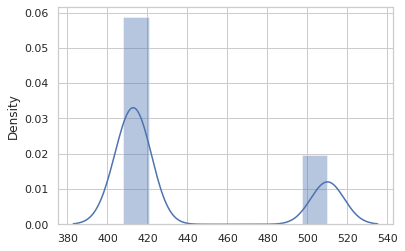

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


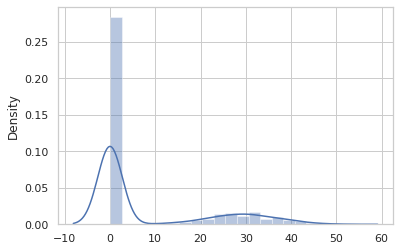

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


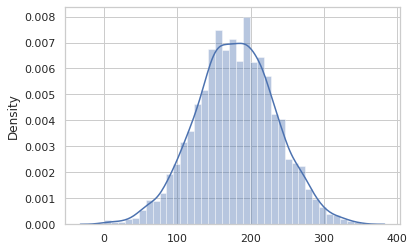

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


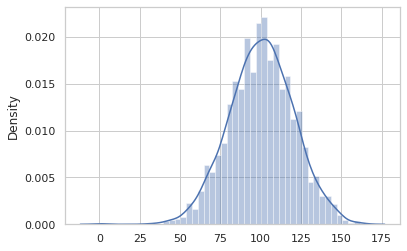

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


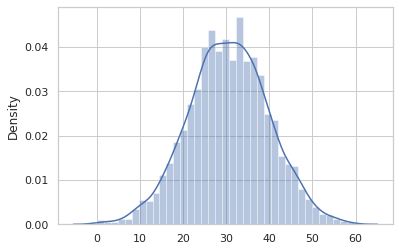

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


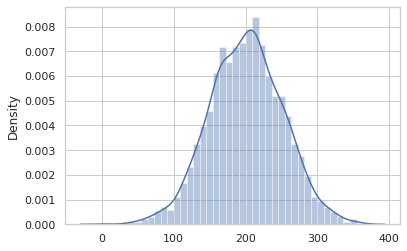

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


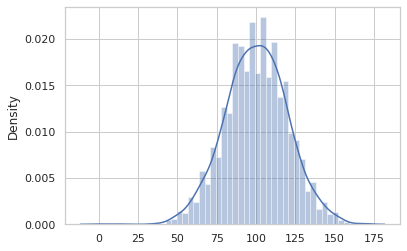

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


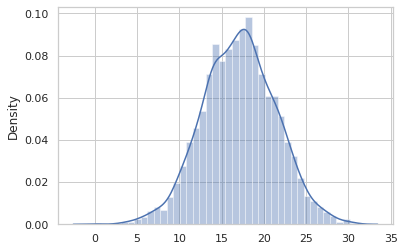

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


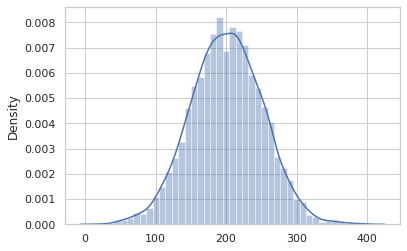

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


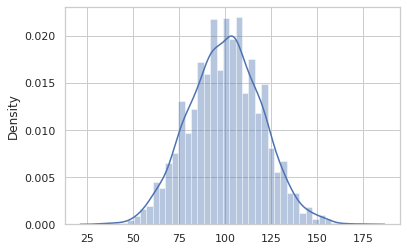

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


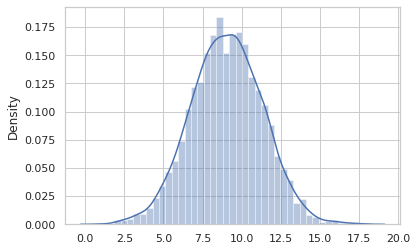

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


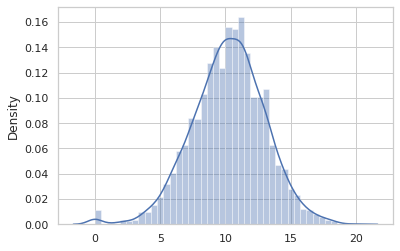

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


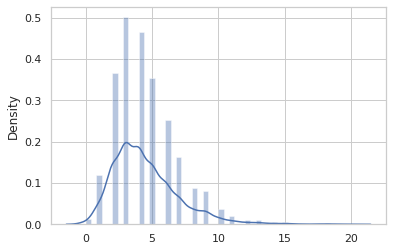

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


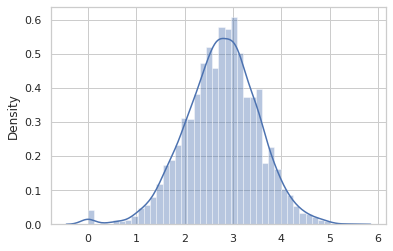

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


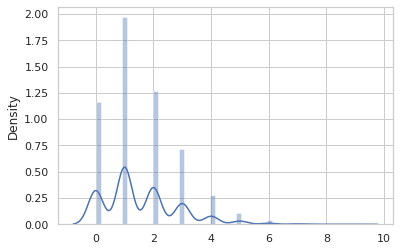

In [89]:
for i in num_var:
  sns.distplot(x=df[i])
  plt.show()

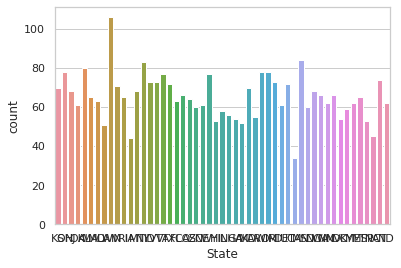

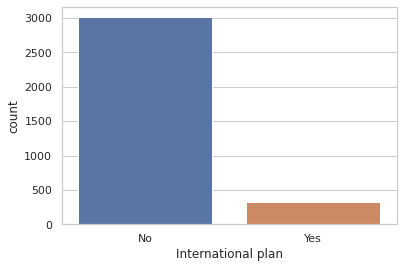

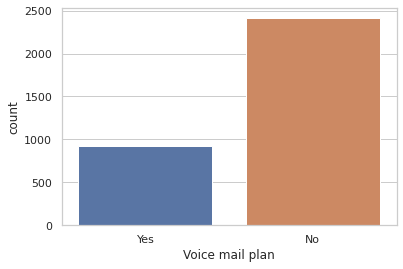

In [92]:
for i in cat_var:
  sns.countplot(x=df[i])
  plt.show()


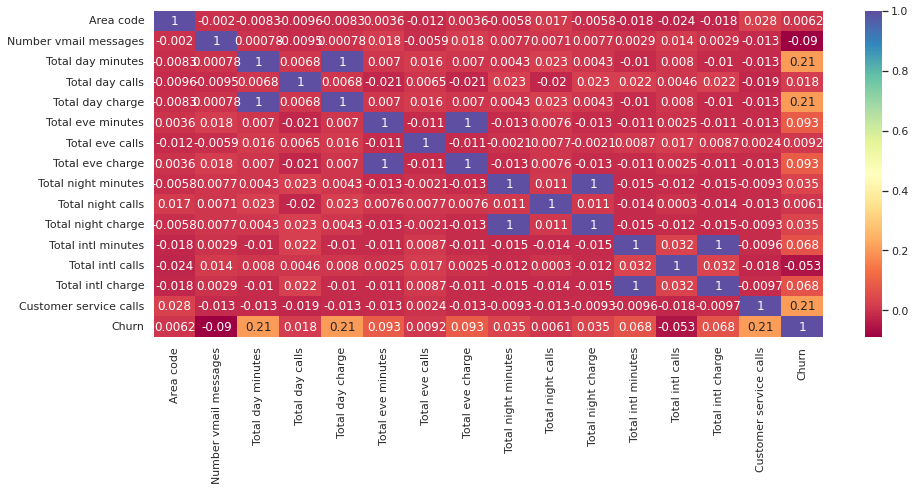

In [96]:
corr=df.corr()
plt.figure(figsize=(15,6))
sns.heatmap( corr,annot=True,cmap="Spectral")

In [ ]:
# Encoding Concept

In [98]:
from sklearn.preprocessing import LabelEncoder

In [101]:
cat_var.columns

Index(['State', 'International plan', 'Voice mail plan'], dtype='object')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   object 
 3   Voice mail plan         3333 non-null   object 
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total day charge        3333 non-null   float64
 8   Total eve minutes       3333 non-null   float64
 9   Total eve calls         3333 non-null   int64  
 10  Total eve charge        3333 non-null   float64
 11  Total night minutes     3333 non-null   float64
 12  Total night calls       3333 non-null   int64  
 13  Total night charge      3333 non-null   float64
 14  Total intl minutes      3333 non-null   

In [105]:
lb=LabelEncoder()
df['State'] = lb.fit_transform(df['State'])
df["International plan"] = lb.fit_transform(df["International plan"])
df["Voice mail plan"] = lb.fit_transform(df["Voice mail plan"])
df["Churn"] = lb.fit_transform(df["Churn"])
df["Area code"] = lb.fit_transform(df["Area code"])


In [106]:
df[["State","International plan", "Voice mail plan","Churn","Area code"]]

,State,International plan,Voice mail plan,Churn,Area code
0,16,0,1,0,1
1,35,0,1,0,1
2,31,0,0,0,1
3,35,1,0,0,0
4,36,1,0,0,1
...,...,...,...,...,...
3328,3,0,1,0,1
3329,49,0,0,0,1
3330,39,0,0,0,2
3331,6,1,0,0,2


In [107]:
x=df.drop(["Churn"],axis=1)
y=df["Churn"]

In [108]:
x

,State,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,16,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,1,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,49,1,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,39,2,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,6,2,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


In [109]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

In [ ]:
# Feature Scaling 

In [110]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x)
x_sc

array([[-6.78649297e-01, -8.45700361e-04, -3.27580479e-01, ...,
        -6.01195090e-01, -8.56904953e-02, -4.27932021e-01],
       [ 6.03169601e-01, -8.45700361e-04, -3.27580479e-01, ...,
        -6.01195090e-01,  1.24116860e+00, -4.27932021e-01],
       [ 3.33312991e-01, -8.45700361e-04, -3.27580479e-01, ...,
         2.11533863e-01,  6.97156372e-01, -1.18821850e+00],
       ...,
       [ 8.73026212e-01,  1.40851395e+00, -3.27580479e-01, ...,
         6.17898340e-01,  1.38712310e+00,  3.32354453e-01],
       [-1.35329082e+00,  1.40851395e+00,  3.05268496e+00, ...,
         2.24335625e+00, -1.87695028e+00,  3.32354453e-01],
       [ 1.07541867e+00, -8.45700361e-04, -3.27580479e-01, ...,
        -1.94830613e-01,  1.24116860e+00, -1.18821850e+00]])

In [ ]:
# Handling Imbalanced dataset

In [111]:
df["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [112]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x_sc,y)

In [113]:
x_smote

array([[-6.78649297e-01, -8.45700361e-04, -3.27580479e-01, ...,
        -6.01195090e-01, -8.56904953e-02, -4.27932021e-01],
       [ 6.03169601e-01, -8.45700361e-04, -3.27580479e-01, ...,
        -6.01195090e-01,  1.24116860e+00, -4.27932021e-01],
       [ 3.33312991e-01, -8.45700361e-04, -3.27580479e-01, ...,
         2.11533863e-01,  6.97156372e-01, -1.18821850e+00],
       ...,
       [ 5.08387055e-01,  1.40851395e+00,  3.05268496e+00, ...,
         1.80628056e-01,  1.47816233e+00, -8.22531042e-01],
       [-2.67308509e-01,  1.40851395e+00, -3.27580479e-01, ...,
        -6.01195090e-01,  1.88271473e-01,  2.54432380e+00],
       [-1.40873857e+00, -1.39625932e+00, -3.27580479e-01, ...,
         2.03491667e-01, -5.05690023e-01, -1.18821850e+00]])

In [114]:
y_smote

0       0
1       0
2       0
3       0
4       0
       ..
5695    1
5696    1
5697    1
5698    1
5699    1
Name: Churn, Length: 5700, dtype: int64